# City of Toronto Ward Data

This dataset contains the City of Toronto ward boundaries in the WGS84 coordinate system. Wards are administrative divisions used for political, electoral, and governance purposes. This dataset contains spatial (geographic) and attribute information for each ward in the city. Let's see the shapefile on a folium map.

## Setup Notebook

In [1]:
# Import 3rd party libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import folium
import matplotlib.pylab as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Import City of Toronto Ward Shape File

In [20]:
# Load the shapefile
wards_data = gpd.read_file('WARD_WGS84.shp')

# Create a folium map
toronto_coords = [43.65107, -79.347015]
map_wards = folium.Map(location=toronto_coords, zoom_start=11)

# Add the wards
folium.GeoJson(wards_data,
               tooltip=folium.GeoJsonTooltip(
                   fields=["AREA_L_CD", "AREA_NAME"],  
                   aliases=["Ward Number:", "Ward Name:"], 
                   localize=True
              )).add_to(map_wards)


# Display the map
map_wards

In [104]:
# View geoDataFrame
wards_data.head()

,AREA_ID,AREA_TYPE,AREA_S_CD,AREA_L_CD,AREA_NAME,X,Y,LONGITUDE,LATITUDE,geometry
0,2551040,WD18,16,16,Don Valley East,318237.290,4844000.0,-79.33298,43.739716,"POLYGON ((-79.31335 43.71699, -79.3195 43.7156..."
1,2551044,WD18,03,03,Etobicoke-Lakeshore,303099.474,4831000.0,-79.52087,43.621646,"POLYGON ((-79.49777 43.65198, -79.49725 43.651..."
2,2551048,WD18,15,15,Don Valley West,314825.876,4843000.0,-79.37536,43.728396,"POLYGON ((-79.35232 43.71573, -79.35209 43.715..."
3,2551052,WD18,23,23,Scarborough North,324522.149,4852000.0,-79.25467,43.809672,"POLYGON ((-79.22591 43.8396, -79.22556 43.8394..."
4,2551056,WD18,11,11,University-Rosedale,313306.543,4837000.0,-79.39432,43.671139,"POLYGON ((-79.39004 43.6905, -79.39004 43.6905..."


## Data Analysis

In [106]:
wards_data.shape

(25, 10)

In [107]:
# Check the columns in geoDataFrame
wards_data.columns

Index(['AREA_ID', 'AREA_TYPE', 'AREA_S_CD', 'AREA_L_CD', 'AREA_NAME', 'X', 'Y',
       'LONGITUDE', 'LATITUDE', 'geometry'],
      dtype='object')

The columns describe the following:
- 'AREA_ID': A unique identifier for each ward in the dataset.
- 'AREA_TYPE': Indicates the type of area (all is WD18 for wards in the 2018 model of Toronto).
- 'AREA_S_CD': A short code representing the ward, likely numeric.
- 'AREA_L_CD': A longer code that may provide additional context or differentiation for the ward.
- 'AREA_NAME': The official name of the ward.
- X,y : coordiantes in a projected coordinate system.
- Longitude, Latitude: Geographic lat and long of the ward's approximate center.
  
We will drop the following columns:

- 'AREA_ID' is unrequired because we just require the ward classification.
- 'AREA_TYPE' only contains one unique value, WD18, therefore it is not providing any new data and is unnecessary.
- X,y: We will be using the geometry, and keep lat and long columns for validation, therefore X,y not necessary.

In [109]:
# Drop AREA_L_CD
wards_data = wards_data.drop(columns=['AREA_ID', 'AREA_TYPE', 'X', 'Y'])

# Check that it has been removed
wards_data.head()

,AREA_S_CD,AREA_L_CD,AREA_NAME,LONGITUDE,LATITUDE,geometry
0,16,16,Don Valley East,-79.33298,43.739716,"POLYGON ((-79.31335 43.71699, -79.3195 43.7156..."
1,03,03,Etobicoke-Lakeshore,-79.52087,43.621646,"POLYGON ((-79.49777 43.65198, -79.49725 43.651..."
2,15,15,Don Valley West,-79.37536,43.728396,"POLYGON ((-79.35232 43.71573, -79.35209 43.715..."
3,23,23,Scarborough North,-79.25467,43.809672,"POLYGON ((-79.22591 43.8396, -79.22556 43.8394..."
4,11,11,University-Rosedale,-79.39432,43.671139,"POLYGON ((-79.39004 43.6905, -79.39004 43.6905..."


Let's explore the differences between 'AREA_S_CD' and 'AREA_L_CD'.

In [111]:
wards_data['AREA_S_CD'].unique()

array(['16', '03', '15', '23', '11', '10', '09', '05', '17', '08', '02',
       '01', '04', '12', '22', '21', '24', '25', '20', '19', '18', '06',
       '07', '14', '13'], dtype=object)

In [112]:
wards_data['AREA_L_CD'].unique()

array(['16', '03', '15', '23', '11', '10', '09', '05', '17', '08', '02',
       '01', '04', '12', '22', '21', '24', '25', '20', '19', '18', '06',
       '07', '14', '13'], dtype=object)

There are no differences between the two, therefore only one will be required to display the ward numbers. We will then drop 'AREA_L_CD'. 

In [114]:
# Drop AREA_L_CD
wards_data = wards_data.drop(columns=['AREA_L_CD'])

# Check that it has been removed
wards_data.head()

,AREA_S_CD,AREA_NAME,LONGITUDE,LATITUDE,geometry
0,16,Don Valley East,-79.33298,43.739716,"POLYGON ((-79.31335 43.71699, -79.3195 43.7156..."
1,03,Etobicoke-Lakeshore,-79.52087,43.621646,"POLYGON ((-79.49777 43.65198, -79.49725 43.651..."
2,15,Don Valley West,-79.37536,43.728396,"POLYGON ((-79.35232 43.71573, -79.35209 43.715..."
3,23,Scarborough North,-79.25467,43.809672,"POLYGON ((-79.22591 43.8396, -79.22556 43.8394..."
4,11,University-Rosedale,-79.39432,43.671139,"POLYGON ((-79.39004 43.6905, -79.39004 43.6905..."


Let's rename columns 'AREA_L_CD' and 'AREA_NAME'

In [116]:
# Rename columns in the GeoDataFrame
wards_data = wards_data.rename(columns={'AREA_S_CD': 'WARD NUMBER', 'AREA_NAME': 'WARD NAME'})

# Review geoDataFrame
wards_data.head()

,WARD NUMBER,WARD NAME,LONGITUDE,LATITUDE,geometry
0,16,Don Valley East,-79.33298,43.739716,"POLYGON ((-79.31335 43.71699, -79.3195 43.7156..."
1,03,Etobicoke-Lakeshore,-79.52087,43.621646,"POLYGON ((-79.49777 43.65198, -79.49725 43.651..."
2,15,Don Valley West,-79.37536,43.728396,"POLYGON ((-79.35232 43.71573, -79.35209 43.715..."
3,23,Scarborough North,-79.25467,43.809672,"POLYGON ((-79.22591 43.8396, -79.22556 43.8394..."
4,11,University-Rosedale,-79.39432,43.671139,"POLYGON ((-79.39004 43.6905, -79.39004 43.6905..."


In [117]:
# Check data types per column
print(wards_data.dtypes)

WARD NUMBER      object
WARD NAME        object
LONGITUDE       float64
LATITUDE        float64
geometry       geometry
dtype: object


## Data Cleaning

In [119]:
# Check for missing values
print(wards_data.isnull().sum())
# Check for duplicates
wards_data.duplicated().sum()

WARD NUMBER    0
WARD NAME      0
LONGITUDE      0
LATITUDE       0
geometry       0
dtype: int64


0

There are no null or duplicated values to be handled. 

## Import City of Toronto Community Council Boundaries GeoJson File

This is a geo-spatial file that outlines the service districts of the City of Toronto. We will combine this with the ward data to group different wards for better understanding and visualization. 

In [14]:
# Load the geojson file
wards_boundaries = gpd.read_file('Community Council Boundaries Data - 4326.geojson')

# Create a folium map
toronto_coords = [43.65107, -79.347015]
map_boundaries = folium.Map(location=toronto_coords, zoom_start=11)

# Add the ward boundaries
folium.GeoJson(wards_boundaries,
               tooltip=folium.GeoJsonTooltip(
                   fields=["AREA_NAME"],  
                   localize=True
               )).add_to(map_boundaries)

# Display the map
map_boundaries
map_boundaries.save('map_boundaries.html')

In [124]:
wards_boundaries.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID,geometry
0,1,2476922.0,26002906.0,0.0,EA,EA,Scarborough Community Council,Scarborough Community Council,17503889,"MULTIPOLYGON (((-79.15179 43.81409, -79.15174 ..."
1,2,2476921.0,26002905.0,0.0,SO,SO,Toronto and East York Community Council,Toronto and East York Community Council,17503905,"MULTIPOLYGON (((-79.29864 43.71515, -79.29837 ..."
2,3,2476920.0,26002904.0,0.0,NO,NO,North York Community Council,North York Community Council,17503921,"MULTIPOLYGON (((-79.31326 43.75221, -79.31302 ..."
3,4,2476919.0,26002903.0,0.0,WE,WE,Etobicoke York Community Council,Etobicoke York Community Council,17503937,"MULTIPOLYGON (((-79.48848 43.75333, -79.48834 ..."


The only column that is required is one that provides the name for each service district. We will use AREA_NAME and drop the remaining columns (other than geometry).

In [126]:
# GeoDataFrame with only AREA_NAME and geometry columns
wards_boundaries= wards_boundaries[['AREA_NAME', 'geometry']]

# View GeoDataFrame
wards_boundaries.head()

,AREA_NAME,geometry
0,Scarborough Community Council,"MULTIPOLYGON (((-79.15179 43.81409, -79.15174 ..."
1,Toronto and East York Community Council,"MULTIPOLYGON (((-79.29864 43.71515, -79.29837 ..."
2,North York Community Council,"MULTIPOLYGON (((-79.31326 43.75221, -79.31302 ..."
3,Etobicoke York Community Council,"MULTIPOLYGON (((-79.48848 43.75333, -79.48834 ..."


Let's explore the AREA_NAME column

In [128]:
wards_boundaries['AREA_NAME'].unique

<bound method Series.unique of 0              Scarborough Community Council
1    Toronto and East York Community Council
2               North York Community Council
3           Etobicoke York Community Council
Name: AREA_NAME, dtype: object>

These names are a mouthful, let us shorten them. 

In [130]:
# Delete 'Community Council' in AREA_NAME
wards_boundaries['AREA_NAME'] = wards_boundaries['AREA_NAME'].str.replace(' Community Council', '', regex=False)

# View GeoDataFrame
wards_boundaries.head()

,AREA_NAME,geometry
0,Scarborough,"MULTIPOLYGON (((-79.15179 43.81409, -79.15174 ..."
1,Toronto and East York,"MULTIPOLYGON (((-79.29864 43.71515, -79.29837 ..."
2,North York,"MULTIPOLYGON (((-79.31326 43.75221, -79.31302 ..."
3,Etobicoke York,"MULTIPOLYGON (((-79.48848 43.75333, -79.48834 ..."


## Combine Community Council Boundaries with Wards

First, we must ensure they are in the same coordinate Reference Systems (CRS) in Python / GeoPandas. First, lets see the CRS information for each file. 

In [133]:
print (wards_boundaries.crs)
print (wards_data.crs)

EPSG:4326
EPSG:4326


We will convert to EPSG:32617 because the units are in meters, which will be the units we require when calculating ward datas. 

In [135]:
# Convert CRS to EPSG:32617
wards_boundaries = wards_boundaries.to_crs("EPSG:32617")  
wards_data = wards_data.to_crs("EPSG:32617")

In [136]:
print (wards_boundaries.crs)
print (wards_data.crs)

EPSG:32617
EPSG:32617


We will now set up the goemetry features to align. First .buffer(0) will fix invalid geometries, such as self-intersections or improper polygon constructions, ensuring the data is valid for spatial operations. Then, .explode() separates multi-part geometries (multi-polygons in wards_boundaries) into individual components, making it easier to handle and analyze each part independently.

In [138]:
# Fix invalid geometries
wards_boundaries["geometry"] = wards_boundaries["geometry"].buffer(0)
wards_data["geometry"] = wards_data["geometry"].buffer(0)

# Explode multi-part geometries into individual parts
wards_boundaries = wards_boundaries.explode(index_parts=False)

We will now use spatial operations to determine which wards are in each boundary. A new column 'WARD DISTRICT' will be added in the ward data. 

In [140]:
# Perform a spatial join to add AREA_NAME to wards_data
wards_data_with_district = gpd.sjoin(wards_data, wards_boundaries[['AREA_NAME', 'geometry']], how="left", predicate="intersects")

# Rename AREA_NAME to WARD DISTRICT
wards_data_with_district = wards_data_with_district.rename(columns={'AREA_NAME': 'WARD DISTRICT'})

# Drop unnecessary columns
wards_data_with_district = wards_data_with_district.drop(columns=['index_right'], errors='ignore')

In [141]:
wards_data_with_district.head()

,WARD NUMBER,WARD NAME,LONGITUDE,LATITUDE,geometry,WARD DISTRICT
0,16,Don Valley East,-79.33298,43.739716,"POLYGON ((635868.077 4841822.174, 635375.169 4...",Toronto and East York
0,16,Don Valley East,-79.33298,43.739716,"POLYGON ((635868.077 4841822.174, 635375.169 4...",North York
0,16,Don Valley East,-79.33298,43.739716,"POLYGON ((635868.077 4841822.174, 635375.169 4...",Scarborough
1,03,Etobicoke-Lakeshore,-79.52087,43.621646,"POLYGON ((621142.679 4834316.93, 621184.054 48...",Toronto and East York
1,03,Etobicoke-Lakeshore,-79.52087,43.621646,"POLYGON ((621142.679 4834316.93, 621184.054 48...",Etobicoke York


Just to clean the data some more, we will change the order of the columns.

In [143]:
column_order = ['WARD NUMBER', 'WARD NAME', 'WARD DISTRICT', 'LONGITUDE', 'LATITUDE', 'geometry']
wards_data_with_district = wards_data_with_district[column_order]

# View GeoDataFrame
wards_data_with_district.head()

,WARD NUMBER,WARD NAME,WARD DISTRICT,LONGITUDE,LATITUDE,geometry
0,16,Don Valley East,Toronto and East York,-79.33298,43.739716,"POLYGON ((635868.077 4841822.174, 635375.169 4..."
0,16,Don Valley East,North York,-79.33298,43.739716,"POLYGON ((635868.077 4841822.174, 635375.169 4..."
0,16,Don Valley East,Scarborough,-79.33298,43.739716,"POLYGON ((635868.077 4841822.174, 635375.169 4..."
1,03,Etobicoke-Lakeshore,Toronto and East York,-79.52087,43.621646,"POLYGON ((621142.679 4834316.93, 621184.054 48..."
1,03,Etobicoke-Lakeshore,Etobicoke York,-79.52087,43.621646,"POLYGON ((621142.679 4834316.93, 621184.054 48..."


In [144]:
wards_data_with_district.shape

(49, 6)

In [145]:
wards_data.shape

(25, 5)

After an initial analysis, it is clear that python is stating that wards are within more that one zone because they intersect its boundary (but are not actually in it). Therefore, we will determine the intersection area of each ward into each district. We then assign a district to each ward by determining the major area that each ward intersects a district.

In [147]:
# Perform an intersection analysis to calculate overlap areas
intersection = gpd.overlay(wards_data_with_district, wards_boundaries, how='intersection')

# Calculate the area of the intersection geometries
intersection['intersection_area'] = intersection['geometry'].area

# For each ward, find the district with the maximum intersection area
wards_data_with_district = (
    intersection.loc[intersection.groupby('WARD NUMBER')['intersection_area'].idxmax()]
    [['WARD NUMBER', 'WARD NAME', 'AREA_NAME', 'geometry']]  # Keep relevant columns
    .rename(columns={'AREA_NAME': 'WARD DISTRICT'})  
)

# View GeoDataFrame
wards_data_with_district.head()

,WARD NUMBER,WARD NAME,WARD DISTRICT,geometry
58,01,Etobicoke North,Etobicoke York,"POLYGON ((614361.91 4846443.252, 614376.274 48..."
55,02,Etobicoke Centre,Etobicoke York,"POLYGON ((618769.981 4839786.381, 618770.007 4..."
10,03,Etobicoke-Lakeshore,Etobicoke York,"POLYGON ((621184.054 4834315.989, 621213.577 4..."
59,04,Parkdale-High Park,Toronto and East York,"POLYGON ((623660.782 4836061.188, 623724.263 4..."
34,05,York South-Weston,Etobicoke York,"POLYGON ((623361.036 4840391.392, 623364.743 4..."


In [148]:
wards_data_with_district.shape

(25, 4)

## EDA

We will plot the wards into each district. 

In [151]:
import folium

# Create a folium map
toronto_coords = [43.65107, -79.347015]
map_district_with_wards = folium.Map(location=toronto_coords, zoom_start=11)

# Add the ward data to the map in red
folium.GeoJson(
    wards_data_with_district,
    style_function=lambda x: {"fillColor": "green", "color": "green", "fillOpacity": 0.2},
    tooltip=folium.GeoJsonTooltip(
        fields=["WARD NUMBER"], 
        aliases=["Ward Number:"], 
        localize=True
    )
).add_to(map_district_with_wards)

# Add the ward boundaries
folium.GeoJson(
    wards_boundaries,
    style_function=lambda x: {"fillColor": "none", "color": "blue", "weight": 2},
    tooltip=folium.GeoJsonTooltip(
        fields=["AREA_NAME"],  
        localize=True
    )
).add_to(map_district_with_wards)

# Display the map
map_district_with_wards

We will plot the percent of each total wards in each district. 

[]

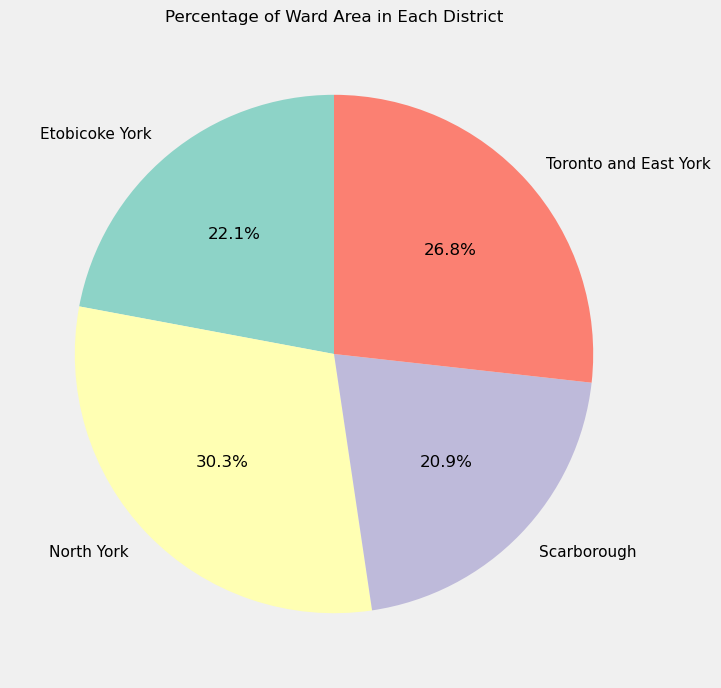

In [190]:
# Group by 'WARD DISTRICT' and calculate the total area percentage
district_area_percentage = (
    intersection.groupby('WARD DISTRICT')['intersection_area'].sum()
    / intersection['intersection_area'].sum()
) * 100

# Get the Set2 colormap
palette = sns.color_palette("Set3", len(district_area_percentage))

# Generate colors based on the number of unique districts
colors = [cmap(i) for i in range(len(district_area_percentage))]
# Plot a pie chart
plt.figure(figsize=(8, 8))
district_area_percentage.plot(kind='pie',
                              autopct='%1.1f%%', 
                              startangle=90,
                             colors = palette)
plt.title("Percentage of Ward Area in Each District")
plt.ylabel('')  # Remove y-axis label for better visualization
plt.plot()

## Output the file to be used with other files

In [543]:
# Set WARD NUMBER as the index
wards_data_with_district = wards_data_with_district.set_index('WARD NUMBER')

# View GeoDataFrame
wards_data_with_district.head()

,WARD NAME,WARD DISTRICT,geometry
WARD NUMBER,,,
01,Etobicoke North,Etobicoke York,"POLYGON ((614361.91 4846443.252, 614376.274 48..."
02,Etobicoke Centre,Etobicoke York,"POLYGON ((618769.981 4839786.381, 618770.007 4..."
03,Etobicoke-Lakeshore,Etobicoke York,"POLYGON ((621184.054 4834315.989, 621213.577 4..."
04,Parkdale-High Park,Toronto and East York,"POLYGON ((623660.782 4836061.188, 623724.263 4..."
05,York South-Weston,Etobicoke York,"POLYGON ((623361.036 4840391.392, 623364.743 4..."


In [545]:
output_path = "../Clean Data/wards_data.geojson"
wards_data_with_district.to_file(output_path, driver="GeoJSON")